In [2]:
## Import modules

import gdal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import linalg
from sarut.tools.data import plot_img, readbinary

matplotlib.rcParams.update({'font.size': 16})

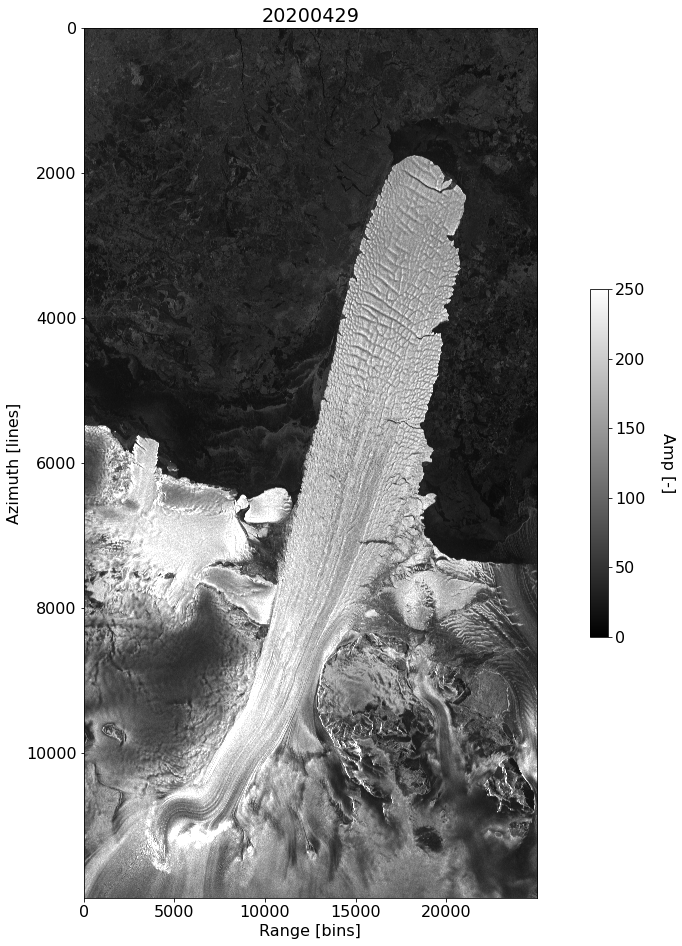

In [40]:
dpath    = './'
date     = '20200429'
slc_file = dpath+date+'.slc.full'

## subset region
l1 = 6000
l2 = 18000
s1 = 25000
s2 = 50000

## read slc
data = gdal.Open(slc_file, gdal.GA_ReadOnly)
slc = data.GetRasterBand(1).ReadAsArray()

## compute magnitude
amp = abs(slc[l1:l2, s1:s2])

## plot amp (without multilook; with antialiasing)
plot_img(amp, title=date, aspect=4, vlim=[0, 250], clabel='Amp [-]', figsize=[16,16], interpolation='antialiased', savetif='amp_'+date+'.tif')


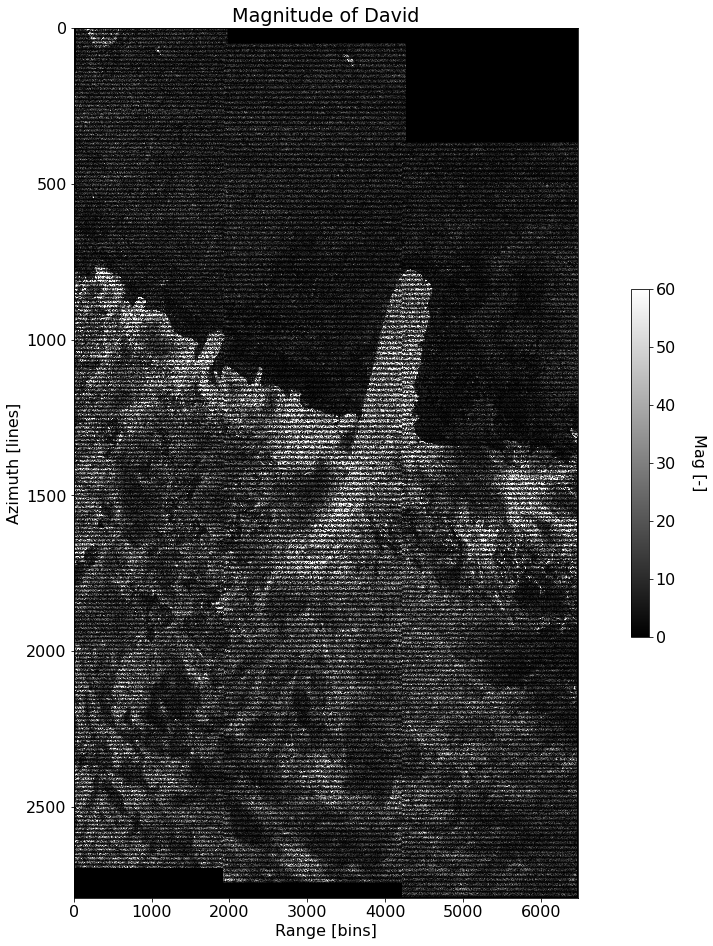

In [16]:
slc_file = './20200429.slc_10alks_10rlks.full'
data = gdal.Open(slc_file, gdal.GA_ReadOnly)
slc2 = data.GetRasterBand(1).ReadAsArray()
mag2 = abs(slc2)

plot_img(mag2, title='Magnitude of David', aspect=4, vlim=[0, 60], clabel='Mag [-]', figsize=[16,16])


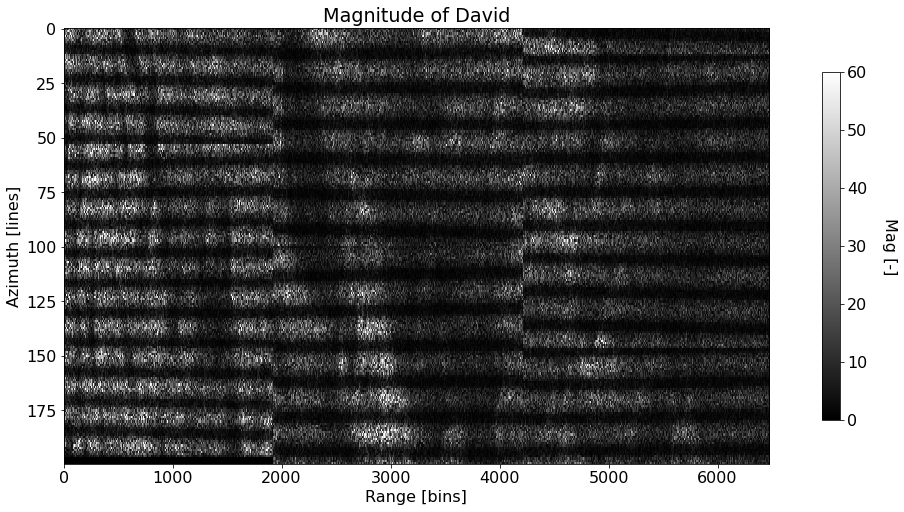

In [27]:
plot_img(mag2[2500:2700, :], title='Magnitude of David', aspect=20, vlim=[0, 60], clabel='Mag [-]', figsize=[16,16])


In [1]:

dem_file = './rema/dem_30_arcsec/dem_david.wgs84'
nsamp = 1599
nline = 415
dem = readbinary(dem_file, nsamp=nsamp, nline=nline, dtype=np.float32)
dem[dem==0.0] = np.nan

plot_img(dem, title='DEM of David', cmap='terrain', vlim=[0, None], clabel='meter', interpolation='none', figsize=[10,10])


NameError: name 'readbinary' is not defined

160.0974488 -74.92507555


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

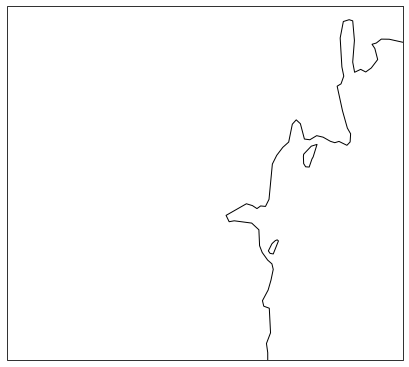

In [30]:
def make_boundary_path(lons, lats):
    boundary_path = np.array([lons[-1, :], lats[-1, :]])
    boundary_path = np.append(boundary_path, np.array([lons[::-1, -1], lats[::-1, -1]]), axis=1)
    boundary_path = np.append(boundary_path, np.array([lons[1, ::-1], lats[1, ::-1]]), axis=1)
    boundary_path = np.append(boundary_path, np.array([lons[:, 1], lats[:, 1]]), axis=1)
    boundary_path = mpath.Path(np.swapaxes(boundary_path, 0, 1))
    return boundary_path

import cartopy.crs as ccrs

import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='papayawhip', linewidth=0.5)


fig = plt.figure(figsize=(12, 6.5))

minlon = 153.4349488
maxlon = 166.7599488
midlon = (minlon + maxlon)/2
minlat = -76.6542422
maxlat = -73.1959089
midlat = (minlat + maxlat)/2
print(midlon, midlat)

lons = np.linspace(minlon, maxlon, nsamp)
lats = np.linspace(minlat, maxlat, nline)

ax = plt.axes(projection=ccrs.Stereographic(central_longitude=midlon, central_latitude=midlat))
#ax.add_feature(land_50m)

ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

boundary_path = make_boundary_path(lons, lats)
ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
p1 = ax.pcolormesh(lons, lats, dem, cmap='terrain', vmin=0, vmax=3800, transform=ccrs.PlateCarree())

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Altitude [m]');

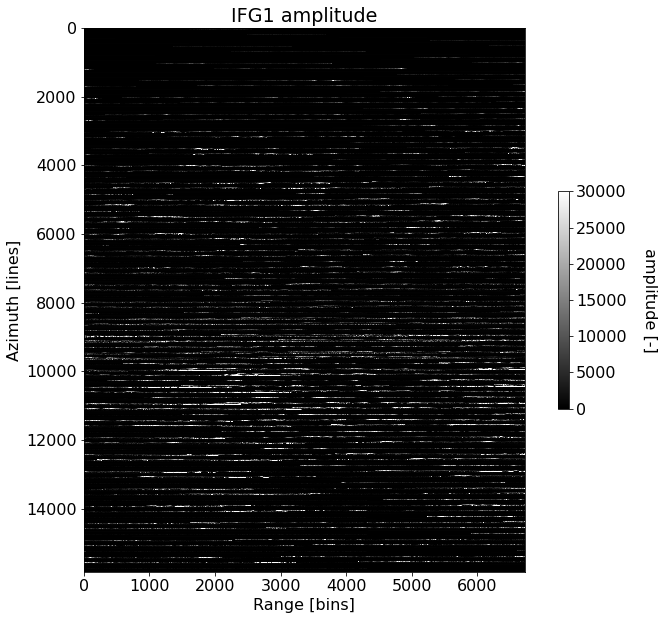

In [12]:
fn1 = './a069/process/20200908-20200920/merged/filt_topophase.unw.geo'

nsamp = 3360
nline = 15840
ifg = readbinary(fn1, nsamp=2*nsamp, nline=nline, dtype=np.float32)
#ifg = readbinary(fn1, nsamp=nsamp, nline=nline, dtype=np.csingle)

plot_img(np.abs(ifg), title='IFG1 amplitude', figsize=[10,10], aspect='auto', clabel='amplitude [-]', origin='upper', vlim=[0, 3e4])
#plot_img(np.angle(ifg), title='IFG1 phase', figsize=[10,10], aspect='auto', clabel='phase [-]', origin='upper', cmap='RdYlBu')

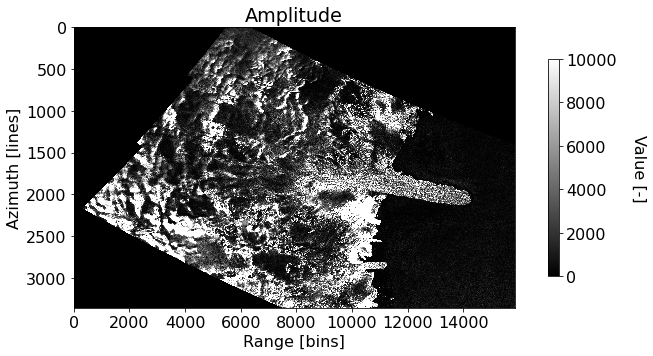

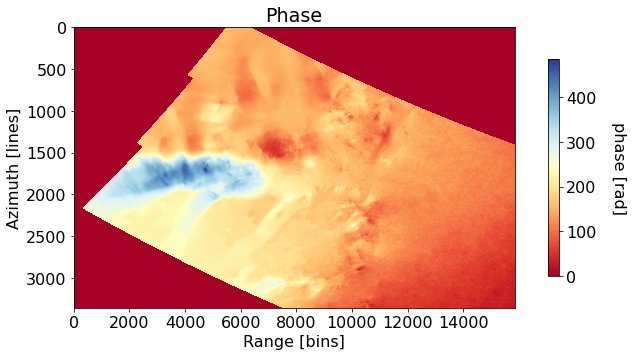

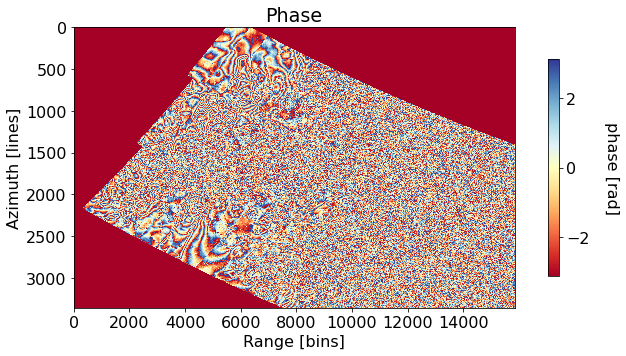

In [45]:
## unwrap ifg1

fname = './a069/process/20200908-20200920/merged/filt_topophase.unw.geo.vrt'
data1 = gdal.Open(fname, gdal.GA_ReadOnly)

ifg_amp1 = data1.GetRasterBand(1).ReadAsArray()
ifg_phi1 = data1.GetRasterBand(2).ReadAsArray()

plot_img(ifg_amp1, title='Amplitude', cmap='gray', vlim=[0, 1e4], orglim=None, origin='upper', aspect=3, clabel='Value [-]', interpolation='none', figsize=[10,10])
plot_img(ifg_phi1, title='Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])
plot_img(np.mod(ifg_phi1, 2*np.pi)-np.pi, title='Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])


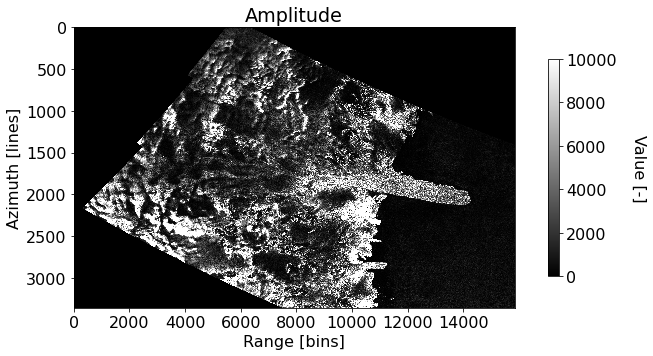

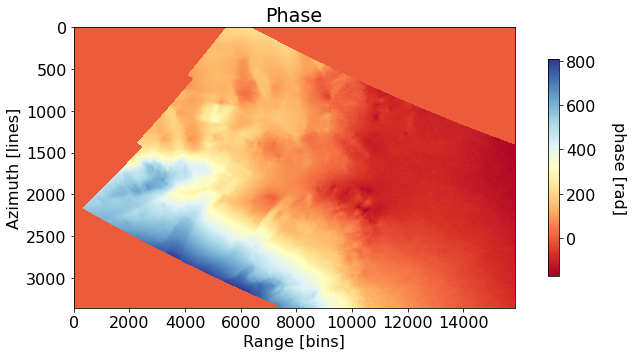

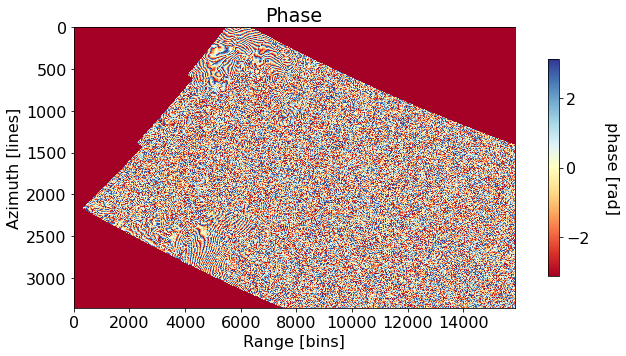

In [48]:
## unwrap ifg2

fname = './a069/process/20200908-20201002/merged/filt_topophase.unw.geo.vrt'
data2 = gdal.Open(fname, gdal.GA_ReadOnly)

ifg_amp2 = data2.GetRasterBand(1).ReadAsArray()
ifg_phi2 = data2.GetRasterBand(2).ReadAsArray()

plot_img(ifg_amp2, title='Amplitude', cmap='gray', vlim=[0, 1e4], orglim=None, origin='upper', aspect=3, clabel='Value [-]', interpolation='none', figsize=[10,10])
plot_img(ifg_phi2, title='Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])
plot_img(np.mod(ifg_phi2, 2*np.pi)-np.pi, title='Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])


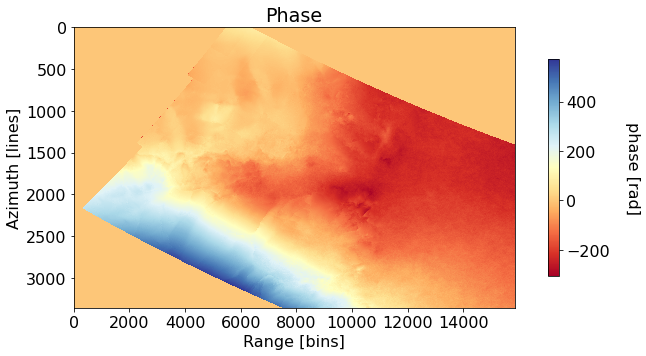

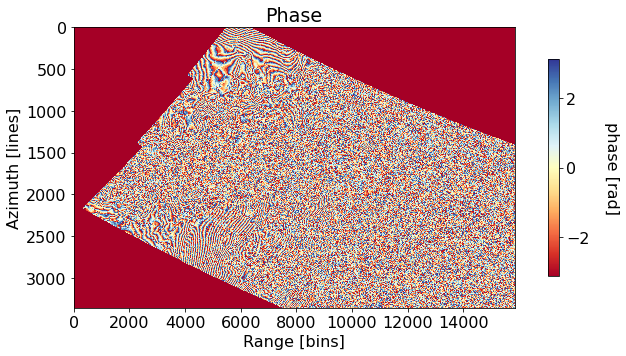

In [49]:
## Double difference: ifg2 - ifg1

ifg_dphi = ifg_phi2 - ifg_phi1

plot_img(ifg_dphi, title='Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])
plot_img(np.mod(ifg_dphi, 2*np.pi)-np.pi, title='Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])



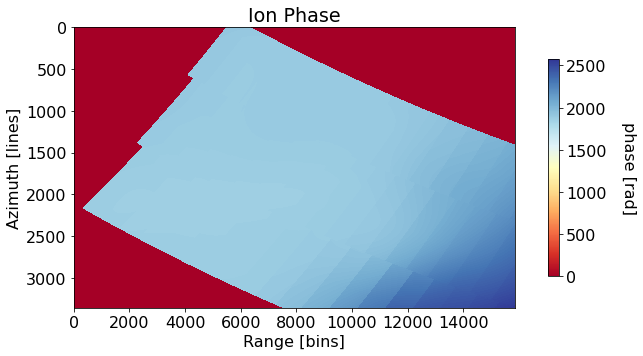

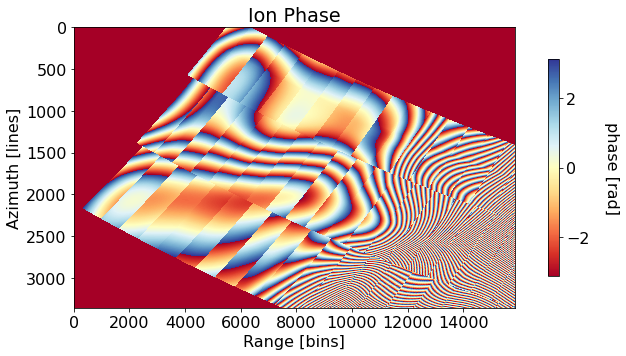

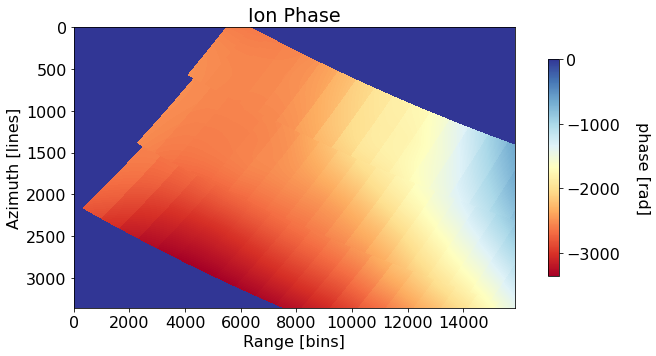

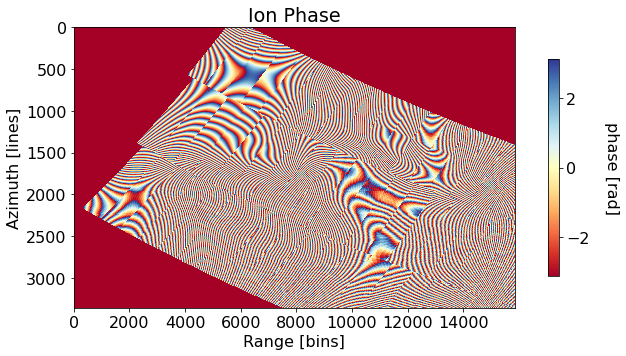

In [53]:
## ionosphere phase of ifg1
fname = './a069/process/20200908-20200920/merged/topophase.ion.geo.vrt'
iondata = gdal.Open(fname, gdal.GA_ReadOnly)
ion_phi1 = iondata.GetRasterBand(1).ReadAsArray()
plot_img(ion_phi1, title='Ion Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])
plot_img(np.mod(ion_phi1,2*np.pi)-np.pi, title='Ion Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])

## ionosphere phase of ifg2
fname = './a069/process/20200908-20201002/merged/topophase.ion.geo.vrt'
iondata = gdal.Open(fname, gdal.GA_ReadOnly)
ion_phi2 = iondata.GetRasterBand(1).ReadAsArray()
plot_img(ion_phi2, title='Ion Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])
plot_img(np.mod(ion_phi2,2*np.pi)-np.pi, title='Ion Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', aspect=3, clabel='phase [rad]', interpolation='none', figsize=[10,10])

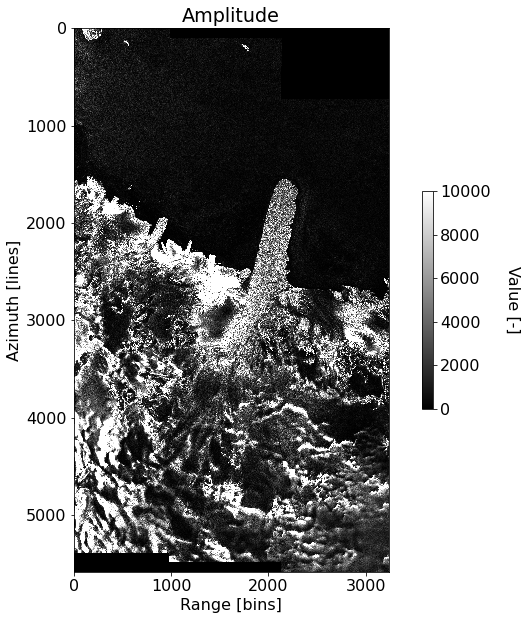

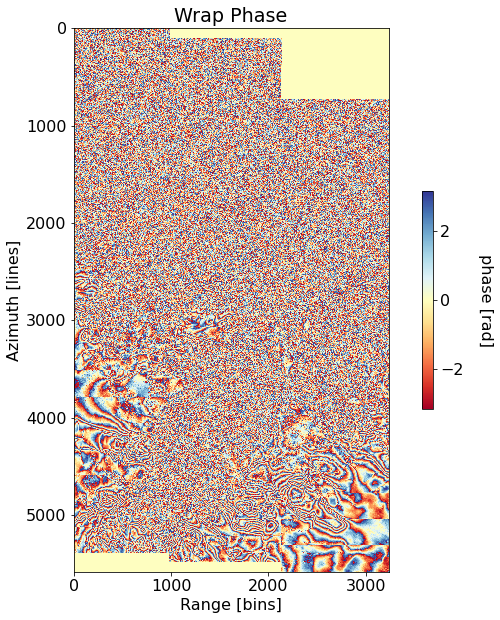

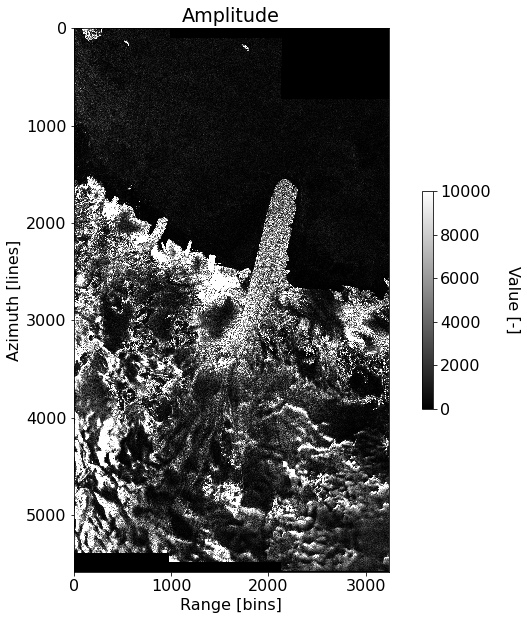

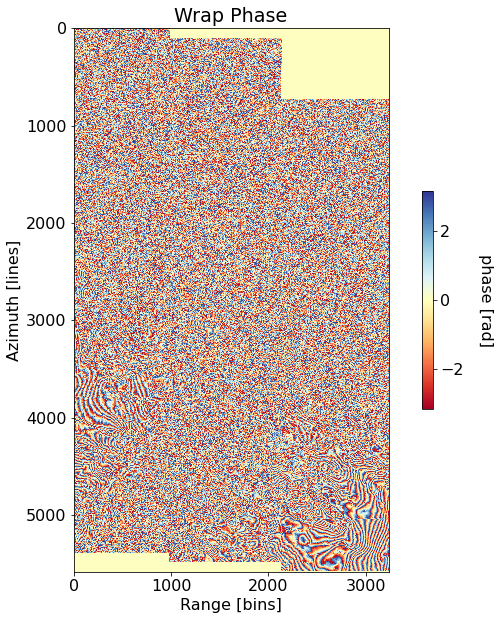

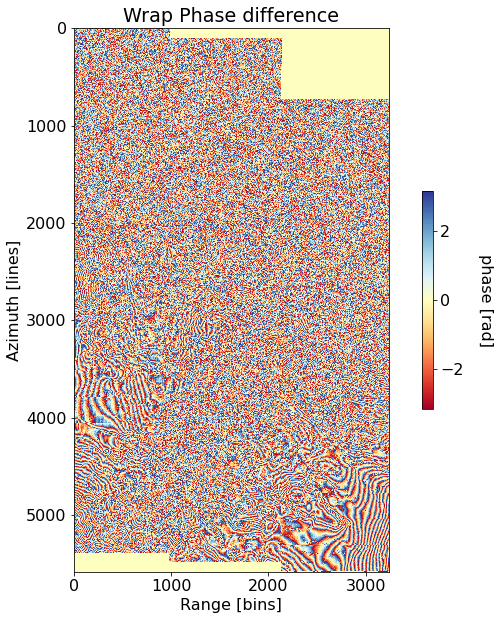

In [57]:
## wrap ifg1
fname = './a069/process/20200908-20200920/merged/filt_topophase.flat.vrt'
data1 = gdal.Open(fname, gdal.GA_ReadOnly)
ifg1 = data1.GetRasterBand(1).ReadAsArray()
plot_img(np.abs(ifg1), title='Amplitude', cmap='gray', vlim=[0, 1e4], orglim=None, origin='upper', clabel='Value [-]', interpolation='none', figsize=[10,10])
plot_img(np.angle(ifg1), title='Wrap Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', clabel='phase [rad]', interpolation='none', figsize=[10,10])

## wrap ifg2
fname = './a069/process/20200908-20201002/merged/filt_topophase.flat.vrt'
data2 = gdal.Open(fname, gdal.GA_ReadOnly)
ifg2 = data2.GetRasterBand(1).ReadAsArray()
plot_img(np.abs(ifg2), title='Amplitude', cmap='gray', vlim=[0, 1e4], orglim=None, origin='upper', clabel='Value [-]', interpolation='none', figsize=[10,10])
plot_img(np.angle(ifg2), title='Wrap Phase', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', clabel='phase [rad]', interpolation='none', figsize=[10,10])

## Double difference of wrap ifg: ifg2 - ifg1
ifg_diff = ifg2 * np.conj(ifg1)
plot_img(np.angle(ifg_diff), title='Wrap Phase difference', cmap='RdYlBu', vlim=None, orglim=None, origin='upper', clabel='phase [rad]', interpolation='none', figsize=[10,10])